In [1]:
#matplotlib is visualization tool and light curve is tool to get data from TESS and Kepler for example.
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from astropy.io import ascii

In [14]:
from matplotlib.patches import Rectangle

In [91]:
#I had issues filtering this with python so I did it manually... ( I shall return!!!)
lc = ascii.read('gtest.csv')

In [3]:
#mjd = lc['HJD'] -2400000 ( I  cheated and created MJD column to CSV) so this is not active

In [92]:
# identify region to do statistics on
t_match = (58400, 58670)

In [11]:
(ymi,yma) = ax.get_ylim()

In [93]:
#lets try to calculate mean and errors from t_match area
#I cheated and created MJD column directly to csv file. 
t_region = lc[(lc['MJD']>t_match[0]) * (lc['MJD']<t_match[1])]

In [94]:
print(t_region)

     HJD           UT Date       Camera ... flux_err Filter        MJD        
------------- ------------------ ------ ... -------- ------ ------------------
2458401.83487 2018-10-10.3366982     bE ...    0.207      g 58401.834869999904
2458401.83615 2018-10-10.3379839     bE ...     0.31      g  58401.83614999987
2458403.87508 2018-10-12.3768081     bE ...    0.154      g  58403.87508000014
2458403.87634 2018-10-12.3780693     bE ...    0.161      g  58403.87633999996
2458403.87762 2018-10-12.3793450     bE ...    0.164      g  58403.87761999993
2458404.86415 2018-10-13.3658379     bE ...    0.152      g 58404.864149999805
2458404.86543 2018-10-13.3671173     bE ...    0.149      g  58404.86542999977
 2458404.8667 2018-10-13.3683908     bE ...     0.15      g  58404.86670000013
2458405.86081 2018-10-14.3624437     bE ...    0.156      g 58405.860809999984
2458405.86207 2018-10-14.3637054     bE ...    0.158      g   58405.8620699998
          ...                ...    ... ...      ...

In [95]:
from astropy.stats import sigma_clip
import numpy.ma as ma

In [98]:
filtered_data = sigma_clip(t_region['mag'], sigma=2, maxiters=5)

In [102]:
base_asassn_g = filtered_data.mean()
base_asassn_g_err = filtered_data.std()
print(base_asassn_g)
print(base_asassn_g_err) #not actual uncertaintly 

13.793332653061224
0.016279621513866173


In [115]:
str1 = 'ASAS $g\' = {:.3f} \pm {:.3f}$'.format(base_asassn_g, base_asassn_g_err)
print(str1)

ASAS $g' = 13.793 \pm 0.016$


ASAS Median (g)\ = 13.793 \Median g_err 0.016


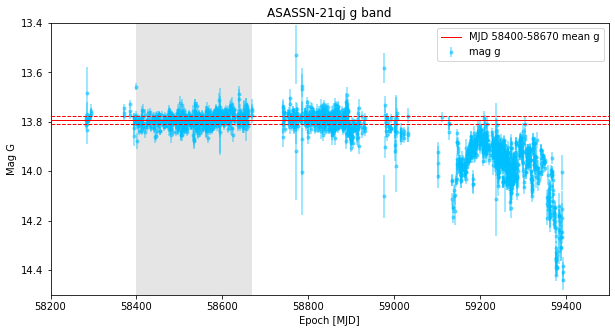

In [166]:
sampl =Rectangle((t_match[0], ymi), t_match[1]-t_match[0], (yma-ymi),facecolor="black", alpha=0.1)
fig, ax = plt.subplots(1,1,figsize=(10,5))

ax.errorbar(mjd, lc['mag'],lc['mag_err'], fmt = '.',color = 'deepskyblue', alpha = 0.5, label="mag g")
#lets set some titles
ax.set_xlabel('Epoch [MJD]')
ax.set_ylabel('Mag G')
ax.str1 = 'ASAS Median (g)\ = {:.3f} \Median g_err \pm {:.3f}'.format(base_asassn_g, base_asassn_g_err)
print(str1)

ax.set_title('ASASSN-21qj g band')
ax.add_patch(sampl)
#lets add some red lines.
ax.axhline(base_asassn_g, c='red', lw =1,zorder=3,label= "MJD 58400-58670 mean g")
ax.axhline(base_asassn_g - base_asassn_g_err, linestyle='dashed', c='red',lw=1, zorder=3)
ax.axhline(base_asassn_g + base_asassn_g_err, linestyle='dashed', c='red',lw=1, zorder=3)

plt.ylim(14.5, 13.4)
plt.xlim(58200, 59500)
ax.legend()


In [ ]:
#next I will do the same for w1 + w2 in same time window. I will also ty to find other magnitudes I, R, K, J... from same time period to get very solid base color-color values.